In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt

Checking the thermal timing per stim presentation:
* prestim: 500 ms
* stim: 250 ms
* post-stim / response window: 1000 ms
* feedback : 250 ms

Expected per stim in a block:
* Total ms per stim: 2000 ms
* Expected frames per stim: 40 thermal images


Expected per block (30 stim total):
* Total ms per stim: 2000 ms * 30 stim = 60000 ms
* Expected frames per stim: 40 thermal images * 30 stim = 1200 thermal images

In [2]:
path = '/home/isaac/Desktop/archive/happyPilot/'

#### Observe accuracy of timing

The thermal camera can provide timings for thermal image acquistion, they may vary but should average out to a fps of 20 Hz. I also use this as a simple way to observe how many frames were collected in total in a given block.

1201


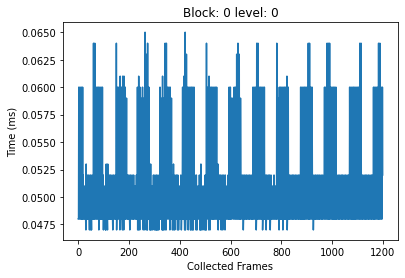

In [66]:
blk = 0
lvl = 0
timeStamp = np.load(path + 'timeStampBlock' + str(blk) + 'level' + str(lvl) + '.npy')
timeStamp =  timeStamp / 10000000
totalFrames = int(1.05 * 60 * 20)
collectedFrames = totalFrames - np.sum(timeStamp == 0)

timeBetweenFrames = np.diff(timeStamp)[:collectedFrames - 1]
print(collectedFrames)
plt.plot(timeBetweenFrames)
plt.ylabel('Time (ms)')
plt.xlabel('Collected Frames')
plt.title('Block: ' + str(blk) + ' level: ' + str(lvl))
plt.show()

Observing if each block collected approximately 1200 thermal images, as we would expect: 40 thermal images * 30 stim = 1200 thermal images in block.

Block: 0 level: 0
collected frames 1201
Average time per frame 0.04998916665712992


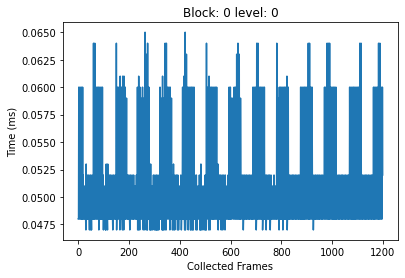

Block: 0 level: 1
collected frames 1202
Average time per frame 0.049968359770127674


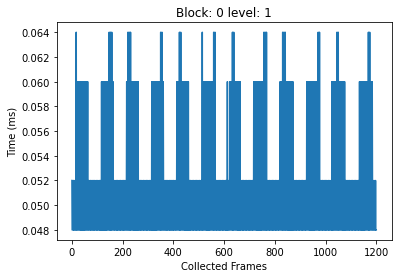

Block: 0 level: 2
collected frames 1201
Average time per frame 0.05001000006993612


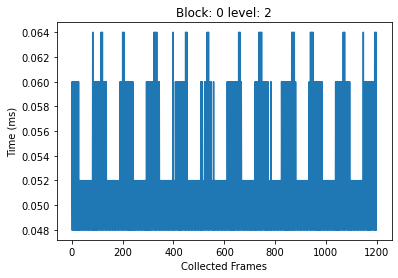

Block: 1 level: 0
collected frames 1201
Average time per frame 0.049969999988873796


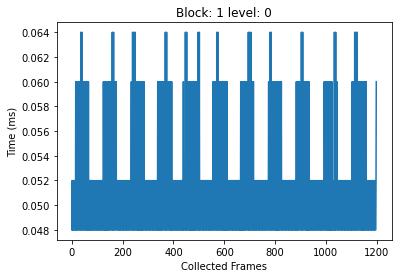

Block: 1 level: 1
collected frames 1201
Average time per frame 0.04999666670958201


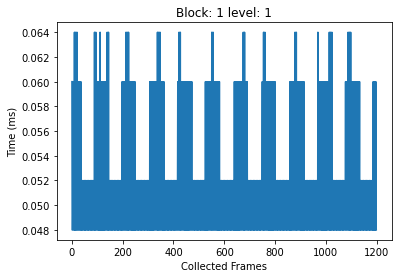

Block: 1 level: 2
collected frames 1202
Average time per frame 0.04996835957161096


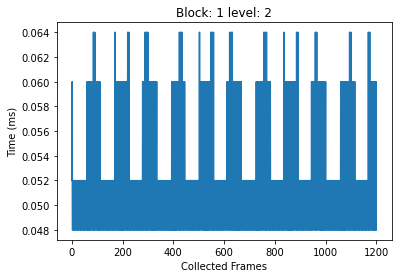

Block: 2 level: 0
collected frames 1201
Average time per frame 0.04998000005880992


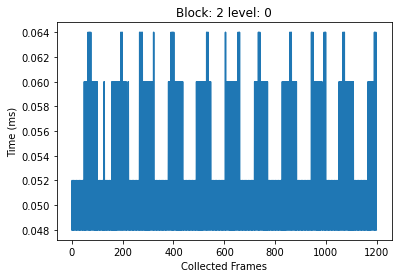

Block: 2 level: 1
collected frames 1200
Average time per frame 0.05004170141784821


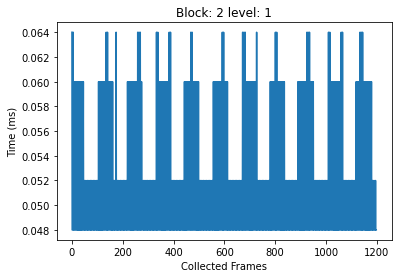

Block: 2 level: 2
collected frames 1200
Average time per frame 0.05001167638586202


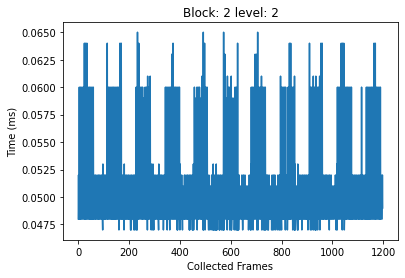

Block: 3 level: 0
collected frames 1201
Average time per frame 0.04998999993006388


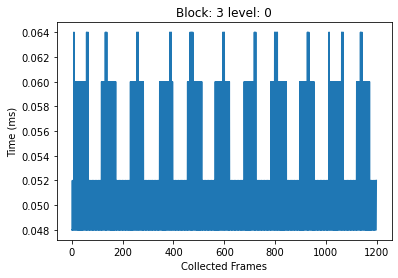

Block: 3 level: 1
collected frames 1201
Average time per frame 0.04998999993006388


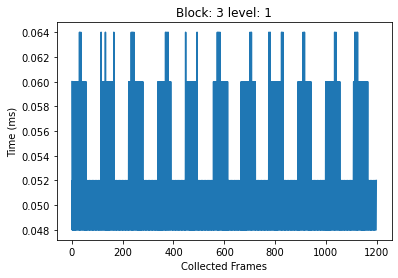

Block: 3 level: 2
collected frames 1201
Average time per frame 0.05


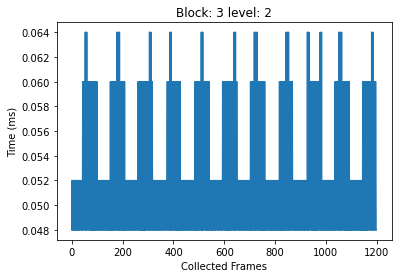

Block: 4 level: 0
collected frames 1201
Average time per frame 0.05


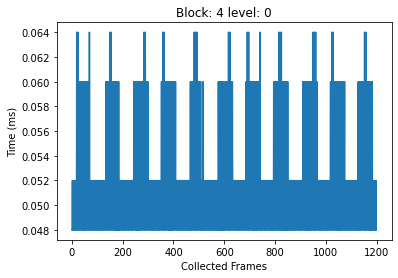

Block: 4 level: 1
collected frames 1201
Average time per frame 0.04998000005880992


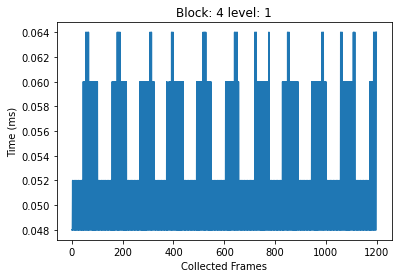

Block: 4 level: 2
collected frames 1203
Average time per frame 0.04992678875534388


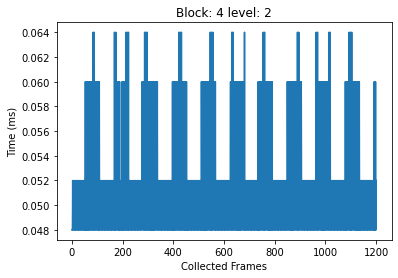

Block: 5 level: 0
collected frames 1204
Average time per frame 0.04993516211696


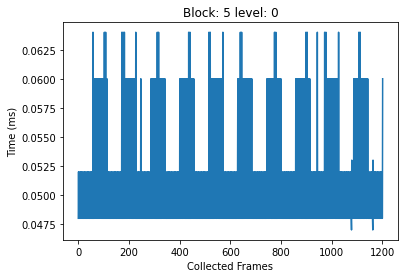

Block: 5 level: 1
collected frames 1202
Average time per frame 0.04993422144557118


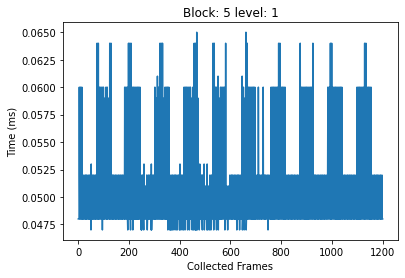

Block: 5 level: 2
collected frames 1200
Average time per frame 0.05003169300757019


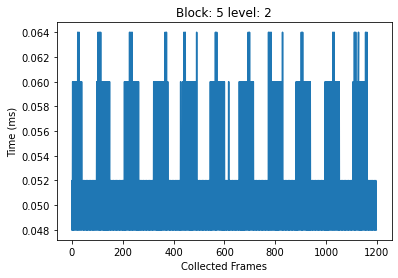

Block: 6 level: 0
collected frames 1202
Average time per frame 0.04994837648167797


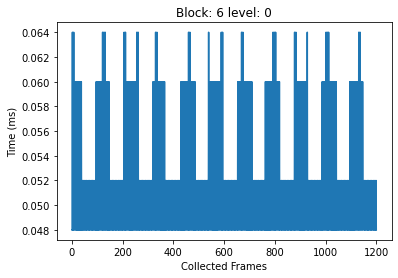

Block: 6 level: 1
collected frames 1202
Average time per frame 0.04997502080010534


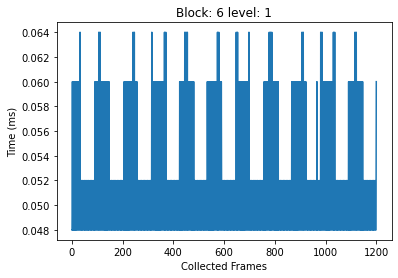

Block: 6 level: 2
collected frames 1203
Average time per frame 0.04991680532445923


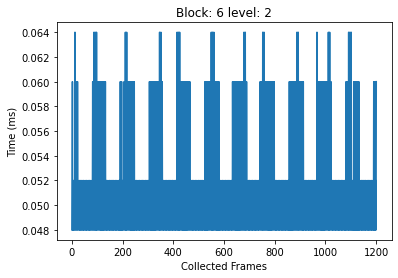

Block: 7 level: 0
collected frames 1202
Average time per frame 0.04994837628316125


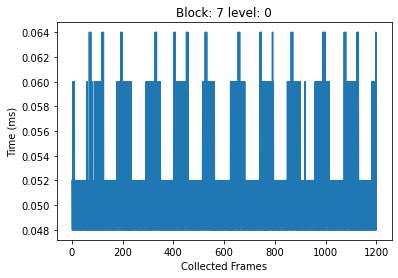

Block: 7 level: 1
collected frames 1203
Average time per frame 0.04991680532445923


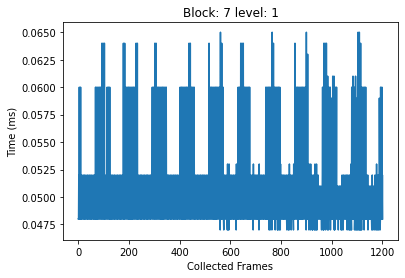

Block: 7 level: 2
collected frames 1203
Average time per frame 0.049925956868887345


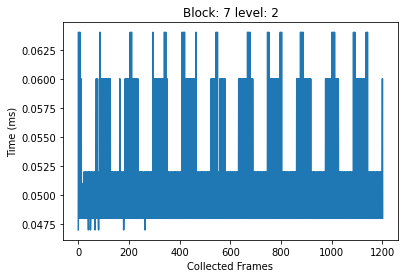

Block: 8 level: 0
collected frames 1203
Average time per frame 0.04993677198787696


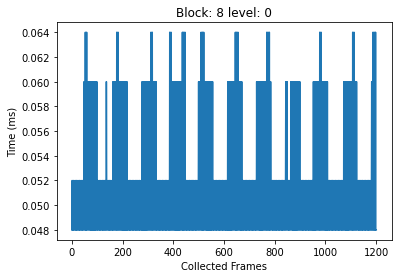

Block: 8 level: 1
collected frames 1203
Average time per frame 0.0499467554187616


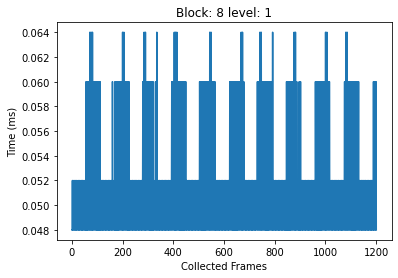

Block: 8 level: 2
collected frames 1201
Average time per frame 0.0499866666396459


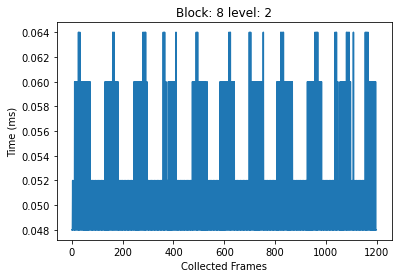

Block: 9 level: 0
collected frames 1203
Average time per frame 0.04987354405509454


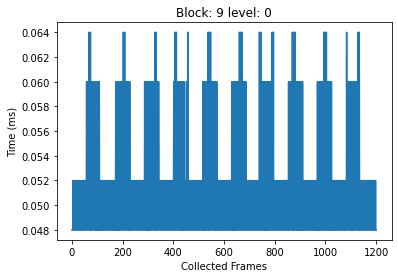

Block: 9 level: 1
collected frames 1201
Average time per frame 0.049969999988873796


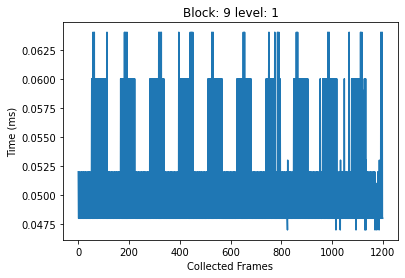

Block: 9 level: 2
collected frames 1202
Average time per frame 0.04993755215907673


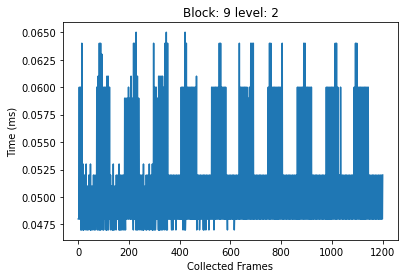

In [67]:
numBlocks = 10
numLevels = 3
collectedFramesList = []
for blk in range(numBlocks):
    for lvl in range(numLevels):
        title = 'Block: ' + str(blk) + ' level: ' + str(lvl)
        print(title)
        
        timeStamp = np.load(path + 'timeStampBlock' + str(blk) + 'level' + str(lvl) + '.npy')
        timeStamp =  timeStamp / 10000000
        
        collectedFrames = totalFrames - np.sum(timeStamp == 0)
        collectedFramesList.append(collectedFrames)
        print('collected frames', collectedFrames)

        timeBetweenFrames = np.diff(timeStamp)[:collectedFrames - 1]
        print('Average time per frame', timeBetweenFrames.mean())

        plt.plot(timeBetweenFrames)
        plt.ylabel('Time (ms)')
        plt.xlabel('Collected Frames')
        plt.title(title)
        plt.show()


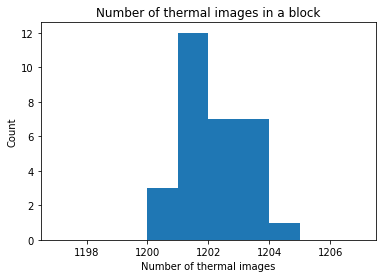

In [68]:
plt.hist(collectedFramesList, bins=np.linspace(1197, 1207, 11))
plt.ylabel('Count')
plt.xlabel('Number of thermal images')
plt.title('Number of thermal images in a block')
plt.show()

#### Observe thermal images

thermal image format, resizing, and converting values to appropriate temperature values. Here I averaged the images from an entire block.

Thermal data file shape: (1260, 110016)
Max pixel value: 34.191437
Min pixel value: 19.37683
Mean pixel value: 23.0298


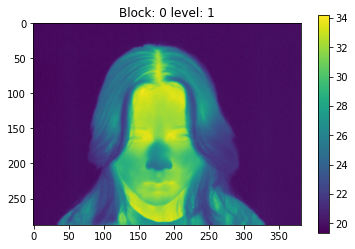

In [63]:
blk = 0
lvl = 1
thermalImages = np.load(path + 'imagesBlock' + str(blk) + 'level' + str(lvl) + '.npy')/ 10 - 100
print('Thermal data file shape:', thermalImages.shape)
thermalImages = thermalImages.reshape(1260, 288, 382)
avgThermalImg = thermalImages[:1200, :, :].mean(axis = 0)

plt.imshow(avgThermalImg)
plt.colorbar()
plt.title('Block: ' + str(blk) + ' level: ' + str(lvl))


print('Max pixel value:', avgThermalImg.max())
print('Min pixel value:', avgThermalImg.min())
print('Mean pixel value:', avgThermalImg.mean())

Do the same as before, but for all blocks. On last blocks, subjects face goes out of frame (think about how to prevent).

Block: 0 level: 0
Max pixel value: 34.014187
Min pixel value: 19.582191
Mean pixel value: 23.070326


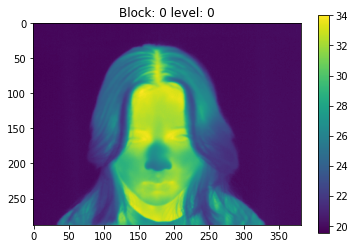

Block: 0 level: 1
Max pixel value: 34.191437
Min pixel value: 19.37683
Mean pixel value: 23.0298


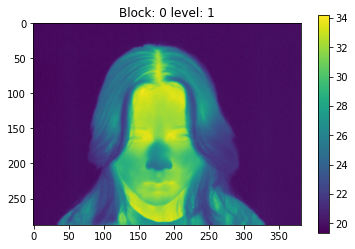

Block: 0 level: 2
Max pixel value: 33.995285
Min pixel value: 19.294577
Mean pixel value: 22.93992


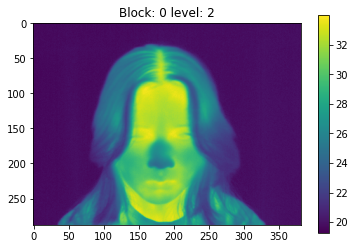

Block: 1 level: 0
Max pixel value: 34.20551
Min pixel value: 19.638872
Mean pixel value: 23.140041


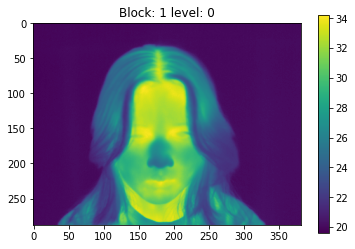

Block: 1 level: 1
Max pixel value: 34.41908
Min pixel value: 19.745922
Mean pixel value: 23.2953


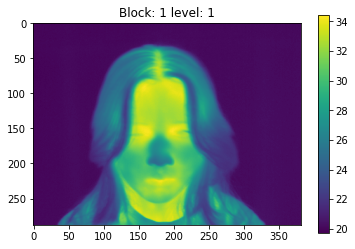

Block: 1 level: 2
Max pixel value: 34.355125
Min pixel value: 19.765394
Mean pixel value: 23.543383


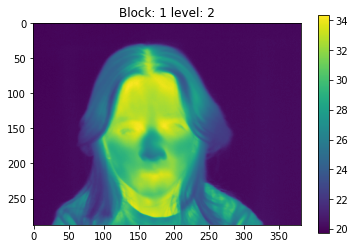

Block: 2 level: 0
Max pixel value: 34.7016
Min pixel value: 19.7993
Mean pixel value: 23.580856


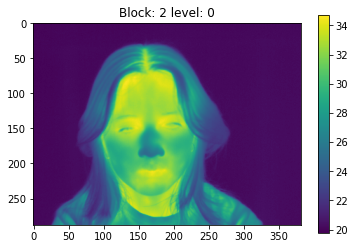

Block: 2 level: 1
Max pixel value: 34.538754
Min pixel value: 19.768253
Mean pixel value: 23.481634


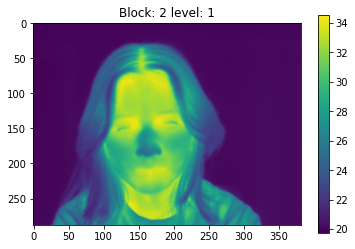

Block: 2 level: 2
Max pixel value: 34.566483
Min pixel value: 19.774979
Mean pixel value: 23.476688


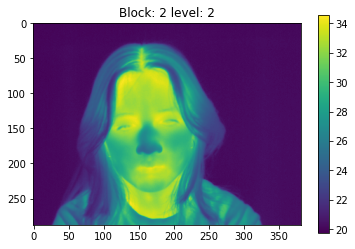

Block: 3 level: 0
Max pixel value: 34.64421
Min pixel value: 19.722242
Mean pixel value: 23.50404


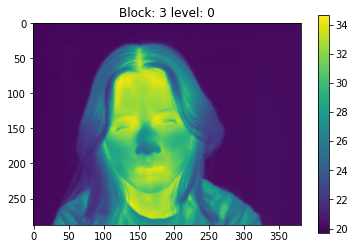

Block: 3 level: 1
Max pixel value: 34.663296
Min pixel value: 19.6862
Mean pixel value: 23.484207


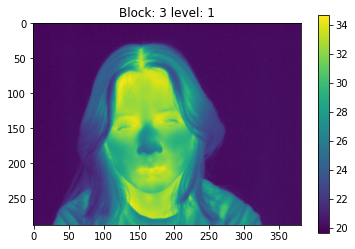

Block: 3 level: 2
Max pixel value: 34.6348
Min pixel value: 19.697182
Mean pixel value: 23.45755


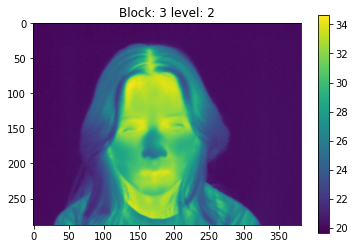

Block: 4 level: 0
Max pixel value: 34.693623
Min pixel value: 19.845478
Mean pixel value: 23.50714


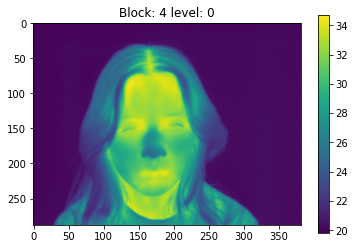

Block: 4 level: 1
Max pixel value: 34.727463
Min pixel value: 19.843567
Mean pixel value: 23.480637


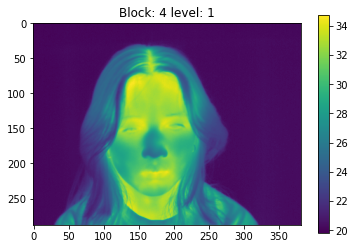

Block: 4 level: 2
Max pixel value: 34.67042
Min pixel value: 19.761835
Mean pixel value: 23.404322


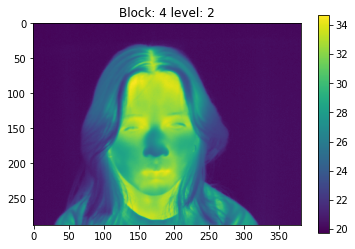

Block: 5 level: 0
Max pixel value: 34.077225
Min pixel value: 19.642862
Mean pixel value: 23.311415


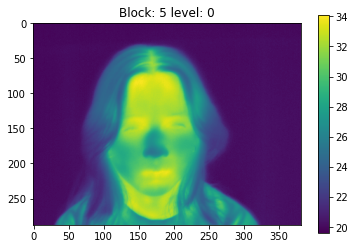

Block: 5 level: 1
Max pixel value: 33.89086
Min pixel value: 19.52817
Mean pixel value: 23.273354


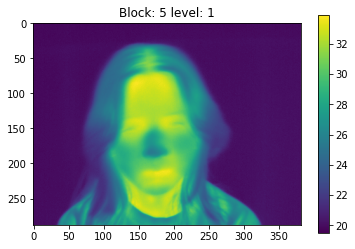

Block: 5 level: 2
Max pixel value: 33.742718
Min pixel value: 19.4878
Mean pixel value: 23.222595


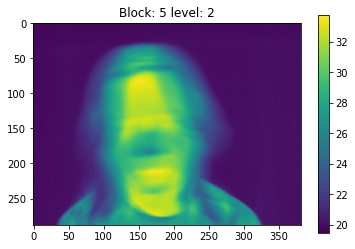

Block: 6 level: 0
Max pixel value: 33.30424
Min pixel value: 19.474222
Mean pixel value: 23.242077


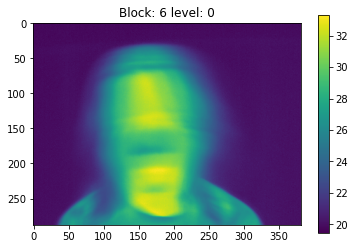

Block: 6 level: 1
Max pixel value: 33.42752
Min pixel value: 19.4996
Mean pixel value: 23.249731


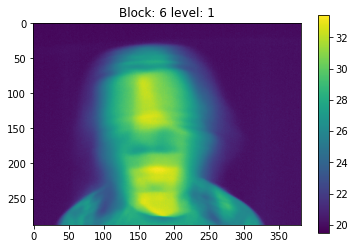

Block: 6 level: 2
Max pixel value: 33.962303
Min pixel value: 19.454596
Mean pixel value: 23.230288


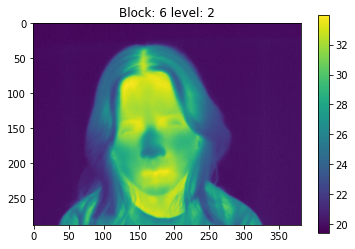

Block: 7 level: 0
Max pixel value: 34.32944
Min pixel value: 19.443018
Mean pixel value: 23.258167


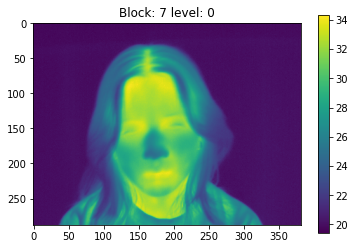

Block: 7 level: 1
Max pixel value: 33.69453
Min pixel value: 19.589125
Mean pixel value: 23.274563


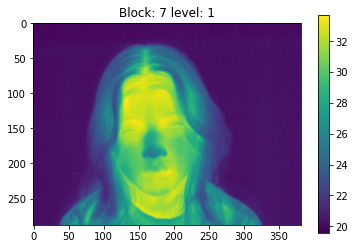

Block: 7 level: 2
Max pixel value: 34.731316
Min pixel value: 19.557884
Mean pixel value: 22.890806


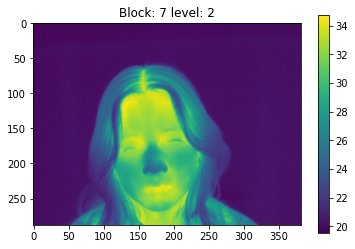

Block: 8 level: 0
Max pixel value: 33.89705
Min pixel value: 19.705202
Mean pixel value: 22.997374


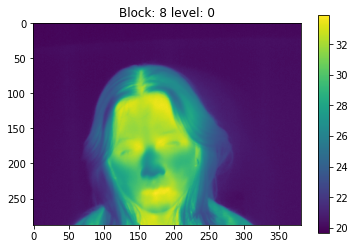

Block: 8 level: 1
Max pixel value: 34.027176
Min pixel value: 19.641834
Mean pixel value: 22.906664


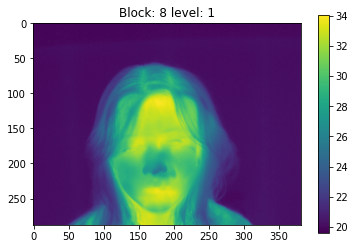

Block: 8 level: 2
Max pixel value: 34.053524
Min pixel value: 19.57451
Mean pixel value: 22.684433


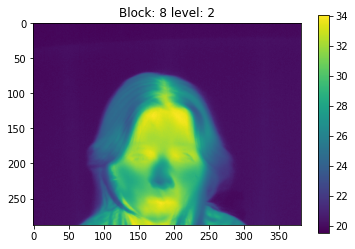

Block: 9 level: 0
Max pixel value: 34.214546
Min pixel value: 19.538776
Mean pixel value: 22.847857


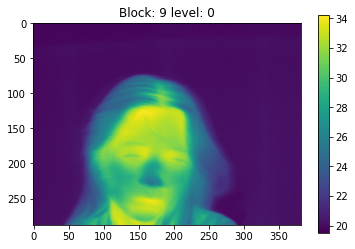

Block: 9 level: 1
Max pixel value: 33.728798
Min pixel value: 19.562357
Mean pixel value: 23.816399


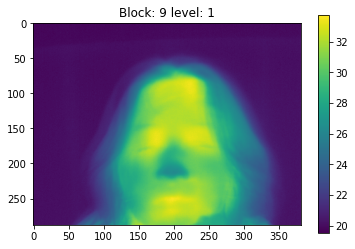

Block: 9 level: 2
Max pixel value: 34.178734
Min pixel value: 19.518679
Mean pixel value: 23.393417


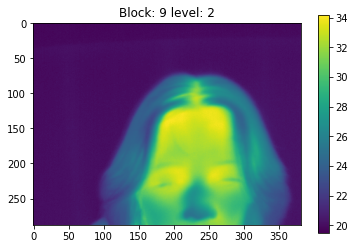

In [47]:
level1Mean = []
level2Mean = []
level3Mean = []

level1Min = []
level2Min = []
level3Min = []

level1Max = []
level2Max = []
level3Max = []

numBlocks = 10
numLevels = 3
for blk in range(numBlocks):
    for lvl in range(numLevels):
        title = 'Block: ' + str(blk) + ' level: ' + str(lvl)
        print(title)
        
        thermalImages = np.load(path + 'imagesBlock' + str(blk) + 'level' + str(lvl) + '.npy')/ 10 - 100
        thermalImages = thermalImages.reshape(1260, 288, 382)
        avgThermalImg = thermalImages[:1200, :, :].mean(axis = 0)
            
        print('Max pixel value:', avgThermalImg.max())
        print('Min pixel value:', avgThermalImg.min())
        print('Mean pixel value:', avgThermalImg.mean())
        
        if lvl == 0:
            level1Mean.append(avgThermalImg.mean())
            level1Min.append(avgThermalImg.min())
            level1Max.append(avgThermalImg.max())

        elif lvl == 1:
            level2Mean.append(avgThermalImg.mean())
            level2Min.append(avgThermalImg.min())
            level2Max.append(avgThermalImg.max())
        else:
            level3Mean.append(avgThermalImg.mean())
            level3Min.append(avgThermalImg.min())
            level3Max.append(avgThermalImg.max())

        
        plt.imshow(avgThermalImg)
        plt.title(title)
        plt.colorbar()
        plt.show()

Plot temperature average, min, and max for average block thermal image.

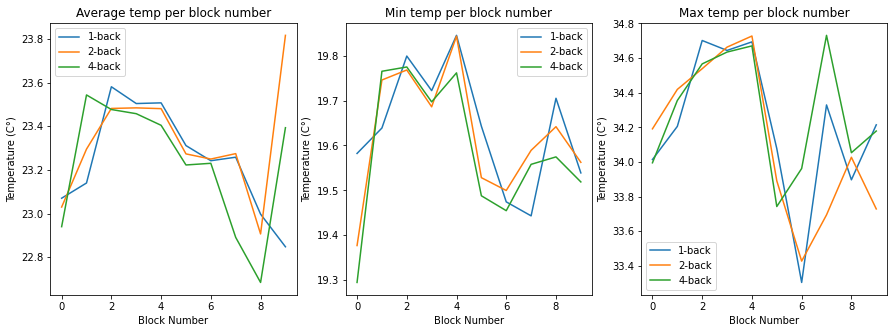

In [78]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(level1Mean, label = '1-back')
plt.plot(level2Mean, label = '2-back')
plt.plot(level3Mean, label = '4-back')
plt.ylabel('Temperature (C°)')
plt.xlabel('Block Number')
plt.title('Average temp per block number')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(level1Min, label = '1-back')
plt.plot(level2Min, label = '2-back')
plt.plot(level3Min, label = '4-back')
plt.ylabel('Temperature (C°)')
plt.xlabel('Block Number')
plt.title('Min temp per block number')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(level1Max, label = '1-back')
plt.plot(level2Max, label = '2-back')
plt.plot(level3Max, label = '4-back')

plt.ylabel('Temperature (C°)')
plt.xlabel('Block Number')
plt.title('Max temp per block number')
plt.legend()

plt.show()

Plotting average temperature per thermal image in a given block. Take first 1200 images.

Block: 0 level: 0


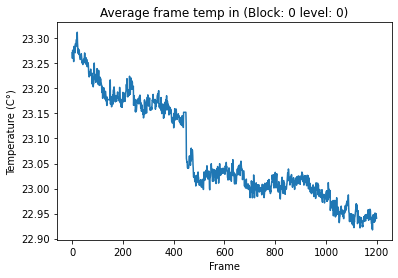

Block: 0 level: 1


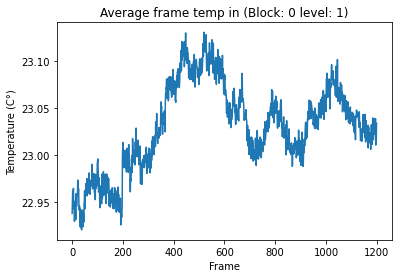

Block: 0 level: 2


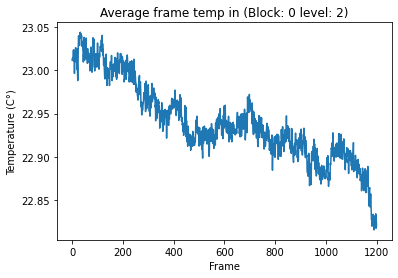

Block: 1 level: 0


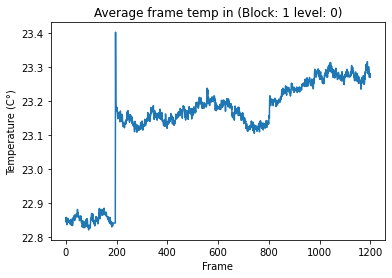

Block: 1 level: 1


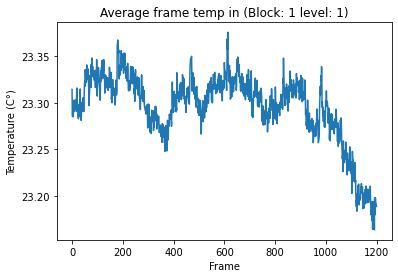

Block: 1 level: 2


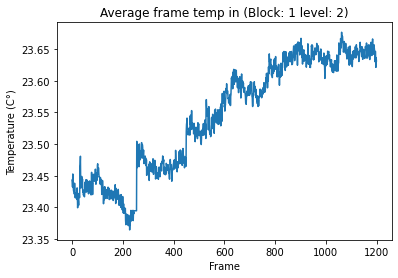

Block: 2 level: 0


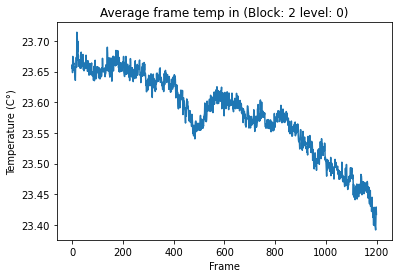

Block: 2 level: 1


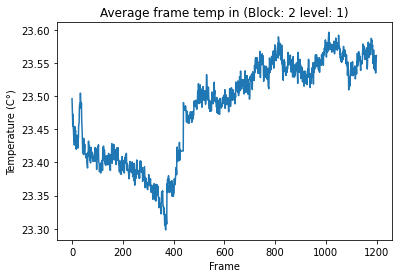

Block: 2 level: 2


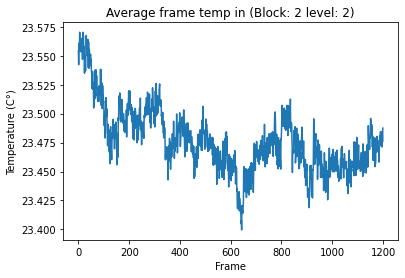

Block: 3 level: 0


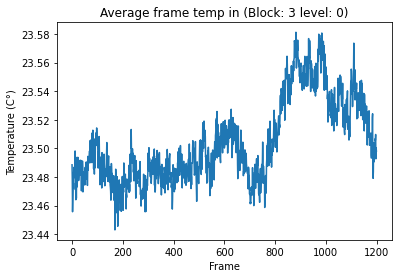

Block: 3 level: 1


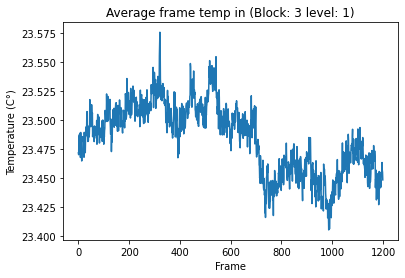

Block: 3 level: 2


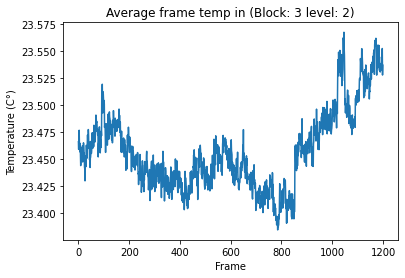

Block: 4 level: 0


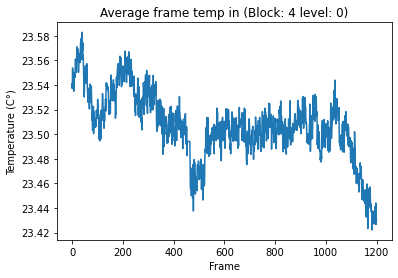

Block: 4 level: 1


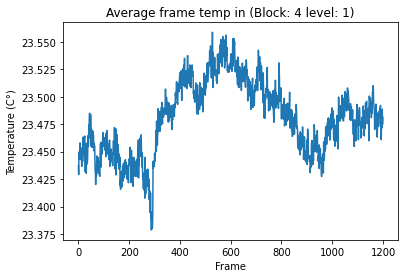

Block: 4 level: 2


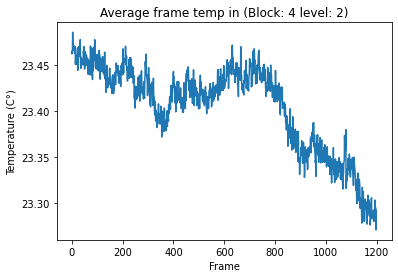

Block: 5 level: 0


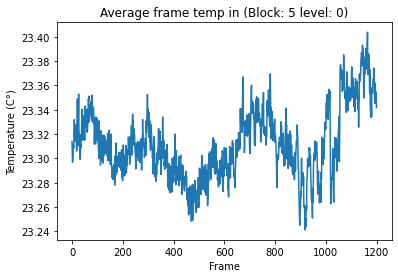

Block: 5 level: 1


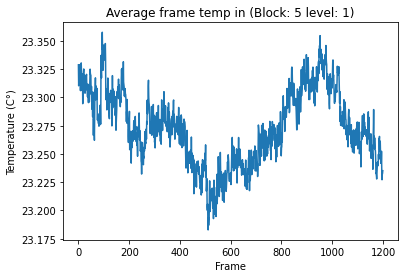

Block: 5 level: 2


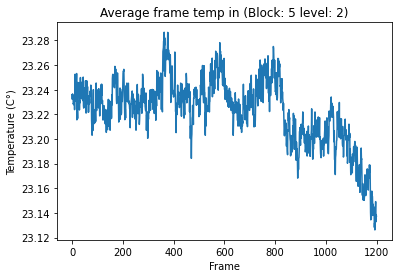

Block: 6 level: 0


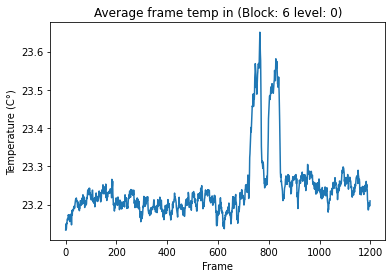

Block: 6 level: 1


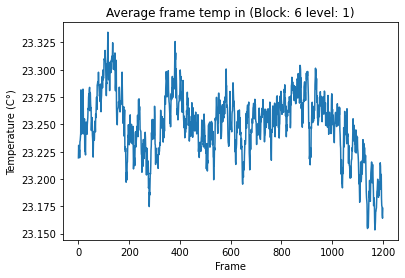

Block: 6 level: 2


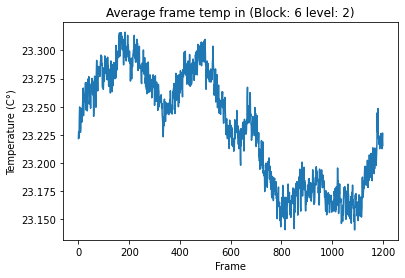

Block: 7 level: 0


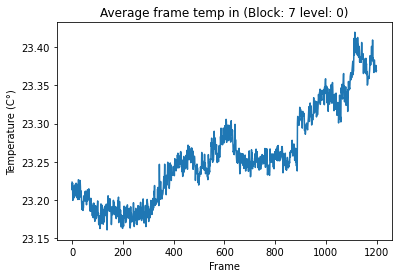

Block: 7 level: 1


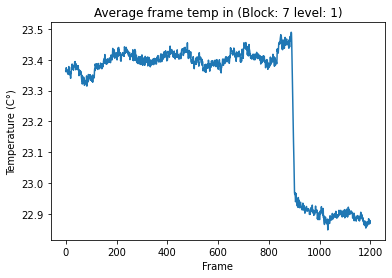

Block: 7 level: 2


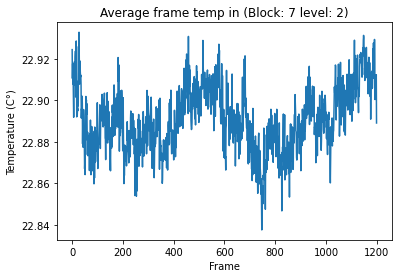

Block: 8 level: 0


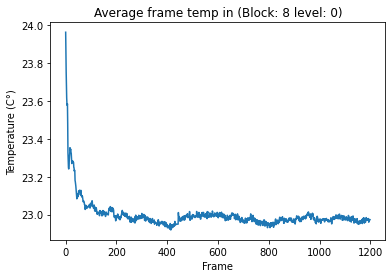

Block: 8 level: 1


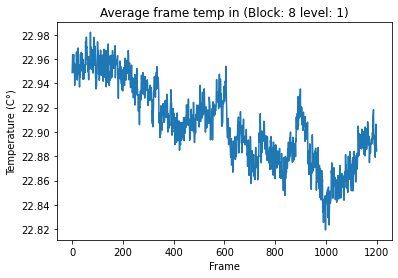

Block: 8 level: 2


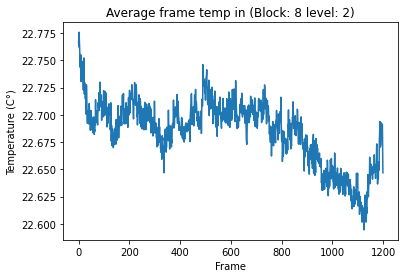

Block: 9 level: 0


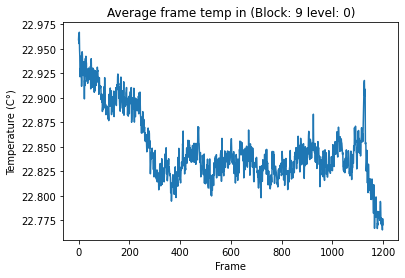

Block: 9 level: 1


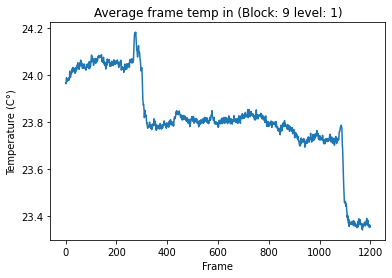

Block: 9 level: 2


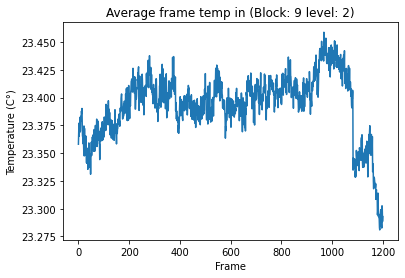

In [57]:
numBlocks = 10
numLevels = 3
for blk in range(numBlocks):
    for lvl in range(numLevels):
        title = 'Block: ' + str(blk) + ' level: ' + str(lvl)
        print(title)
        
        
        thermalImages = np.load(path + 'imagesBlock' + str(blk) + 'level' + str(lvl) + '.npy')/ 10 - 100
        thermalImages = thermalImages.reshape(1260, 288, 382)
        avgThermalImg = thermalImages[:1200, :, :].mean(axis=(1, 2))
            
        plt.plot(avgThermalImg)
        plt.ylabel('Temperature (C°)')
        plt.xlabel('Frame')
        plt.title('Average frame temp in (' + title +')')
        plt.show()